In [42]:
import numpy as np
import pandas as pd
import os

In [43]:
def probability(file):
    old = file['Task_Type']==0
    new = file['Task_Type']==1
    condlist=[old & (file['Res1']==1),
              old & (file['Res1']==2),
              old & (file['Res1']==3),
              old & (file['Res1']==4),
              new & (file['Res1']==1),
              new & (file['Res1']==2),
              new & (file['Res1']==3),
              new & (file['Res1']==4),
             ]
    choicelist = ['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC', 'FA-HC', 'FA-LC', 'CR-LC', 'CR-HC']
    file['Response'] = np.select(condlist, choicelist)
    
    data_old = file[old]
    data_new = file[new]
    
    olds = data_old.groupby(['Response'])['Trial'].count()/len(data_old)
    news = data_new.groupby(['Response'])['Trial'].count()/len(data_new)
    probability = pd.concat([olds, news])
    
    return probability

In [44]:
fileList = os.listdir('./DMdata')

In [45]:
response = pd.DataFrame(index = ['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC', 'FA-HC', 'FA-LC', 'CR-LC', 'CR-HC'])

for i in fileList:
    filePath = pd.read_csv('./DMdata/{}/{}_test.txt'.format(i, i), '\t', index_col=False)
    response['{}_test'.format(i)] = probability(filePath)

response

,DM01_test,DM02_test,DM03_test,DM04_test,DM05_test,DM06_test,DM07_test,DM08_test,DM09_test,DM10_test,...,DM22_test,DM23_test,DM24_test,DM25_test,DM26_test,DM27_test,DM28_test,DM29_test,DM30_test,DM31_test
HIT-HC,0.670455,0.431818,0.609848,0.696970,0.469697,0.416667,0.299242,0.405303,0.265152,0.693182,...,0.416667,0.465909,0.321970,0.409091,0.655303,0.181818,0.306818,0.178030,0.215909,0.375000
HIT-LC,0.140152,0.291667,0.140152,0.007576,0.215909,0.159091,0.280303,0.261364,0.371212,0.071970,...,0.265152,0.284091,0.143939,0.310606,0.102273,0.234848,0.325758,0.219697,0.231061,0.128788
MISS-LC,0.106061,0.143939,0.140152,0.018939,0.068182,0.075758,0.181818,0.242424,0.359848,0.102273,...,0.250000,0.219697,0.446970,0.272727,0.087121,0.556818,0.329545,0.500000,0.541667,0.178030
MISS-HC,0.083333,0.132576,0.109848,0.276515,0.246212,0.348485,0.238636,0.090909,0.003788,0.132576,...,0.068182,0.030303,0.087121,0.007576,0.155303,0.026515,0.037879,0.102273,0.011364,0.318182
FA-HC,0.030303,0.071970,0.022727,0.132576,0.056818,0.064394,0.034091,0.018939,NaN,0.018939,...,0.079545,0.007576,0.007576,0.015152,0.121212,0.056818,0.045455,0.079545,NaN,0.087121
FA-LC,0.094697,0.287879,0.079545,0.015152,0.189394,0.090909,0.155303,0.102273,0.215909,0.056818,...,0.280303,0.276515,0.083333,0.170455,0.121212,0.268939,0.287879,0.193182,0.162879,0.079545
CR-LC,0.344697,0.314394,0.306818,0.037879,0.106061,0.090909,0.321970,0.594697,0.772727,0.250000,...,0.428030,0.568182,0.564394,0.727273,0.140152,0.647727,0.541667,0.560606,0.784091,0.337121
CR-HC,0.530303,0.325758,0.590909,0.814394,0.647727,0.753788,0.488636,0.284091,0.011364,0.674242,...,0.212121,0.147727,0.344697,0.087121,0.617424,0.026515,0.125000,0.166667,0.053030,0.496212


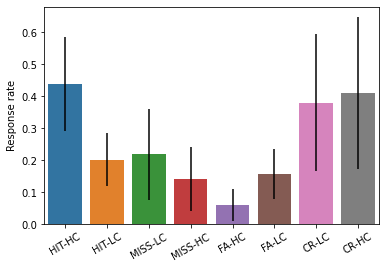

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(response.index, response.mean(axis=1), yerr=np.std(response, axis=1))
plt.xticks(rotation=30)
plt.ylabel('Response rate')
plt.show()

In [47]:
def correct_rate(file1, file2):
    file = file2.copy()
    old = file.drop(file.loc[file['Res2']==0].index)
    old = pd.merge(file1, old, left_on='ObjID', right_on='Object_ID', how='left')
    old = old.drop(old.loc[old['Res2']==5].index)
    
    condlist = [(old['LocID']!=old['Res2']),
                (old['LocID']==old['Res2'])]
    choicelist = ['wrong', 'correct']
    old['Correct rate'] = np.select(condlist, choicelist)
    
    old = old[['Correct rate', 'Response']]
    corrects = old.groupby(['Correct rate', 'Response'])['Correct rate'].count()
    correct_rate = corrects/old.groupby(['Response'])['Correct rate'].count()
    return correct_rate

In [48]:
memory = pd.DataFrame(index=[['correct', 'correct', 'correct', 'correct', 'wrong', 'wrong', 'wrong', 'wrong'],
                            ['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC', 'FA-HC', 'FA-LC', 'CR-LC', 'CR-HC']])

for i in fileList:
    filePath1 = pd.read_csv('./DMdata/{}/{}_study.txt'.format(i, i), '\t', index_col=False)
    filePath2 = pd.read_csv('./DMdata/{}/{}_test.txt'.format(i, i), '\t', index_col=False)
    probability(filePath2)
    memory['{}_memory'.format(i)] = correct_rate(filePath1, filePath2)

memory = memory.rename({'HIT-HC':'HIT-HC&SRC', 'HIT-LC':'HIT-LC&SRC', 'MISS-LC':'MISS-LC&SRC', 'MISS-HC':'MISS-HC&SRC'})
memory

DM01_memory  DM02_memory  DM03_memory  DM04_memory  \
correct HIT-HC&SRC      0.888199     0.459459     0.917808     0.555556   
        HIT-LC&SRC      0.444444     0.347826     1.000000     0.500000   
        MISS-LC&SRC     0.600000          NaN     0.666667     0.600000   
        MISS-HC&SRC          NaN          NaN          NaN     0.367647   
wrong   FA-HC                NaN          NaN          NaN          NaN   
        FA-LC                NaN          NaN          NaN          NaN   
        CR-LC                NaN          NaN          NaN          NaN   
        CR-HC                NaN          NaN          NaN          NaN   

                     DM05_memory  DM06_memory  DM07_memory  DM08_memory  \
correct HIT-HC&SRC      0.655738     0.552381     0.593220     0.962963   
        HIT-LC&SRC           NaN     0.425000     0.294118     0.285714   
        MISS-LC&SRC          NaN     0.210526     0.545455     0.500000   
        MISS-HC&SRC          NaN     0.225000     0.210526          NaN   
wrong   FA-HC                NaN          NaN          NaN          NaN   
        FA-LC                NaN          NaN          NaN          NaN   
        CR-LC                NaN          NaN          NaN          NaN   
        CR-HC                NaN          NaN          NaN          NaN   

                     DM09_memory  DM10_memory  ...  DM22_memory  DM23_memory  \
correct HIT-HC&SRC      0.822581     0.448276  ...     0.581081     0.625000   
        HIT-LC&SRC      0.567568     0.105263  ...          NaN     0.351351   
        MISS-LC&SRC          NaN          NaN  ...          NaN          NaN   
        MISS-HC&SRC          NaN          NaN  ...          NaN          NaN   
wrong   FA-HC                NaN          NaN  ...          NaN          NaN   
        FA-LC                NaN          NaN  ...          NaN          NaN   
        CR-LC                NaN          NaN  ...          NaN          NaN   
        CR-HC                NaN          NaN  ...          NaN          NaN   

                     DM24_memory  DM25_memory  DM26_memory  DM27_memory  \
correct HIT-HC&SRC      0.708333     0.816901     0.664634     0.545455   
        HIT-LC&SRC      0.235294     0.666667     0.347826          NaN   
        MISS-LC&SRC     0.333333          NaN     0.375000          NaN   
        MISS-HC&SRC          NaN          NaN     0.250000          NaN   
wrong   FA-HC                NaN          NaN          NaN          NaN   
        FA-LC                NaN          NaN          NaN          NaN   
        CR-LC                NaN          NaN          NaN          NaN   
        CR-HC                NaN          NaN          NaN          NaN   

                     DM28_memory  DM29_memory  DM30_memory  DM31_memory  
correct HIT-HC&SRC      0.666667      0.30303     0.880952     0.467391  
        HIT-LC&SRC      0.285714      0.28000     0.523810     0.047619  
        MISS-LC&SRC     0.500000      0.50000          NaN     0.250000  
        MISS-HC&SRC          NaN          NaN          NaN     1.000000  
wrong   FA-HC                NaN          NaN          NaN          NaN  
        FA-LC                NaN          NaN          NaN          NaN  
        CR-LC                NaN          NaN          NaN          NaN  
        CR-HC                NaN          NaN          NaN          NaN  

[8 rows x 31 columns]

In [49]:
correct_memory = memory.loc['correct']

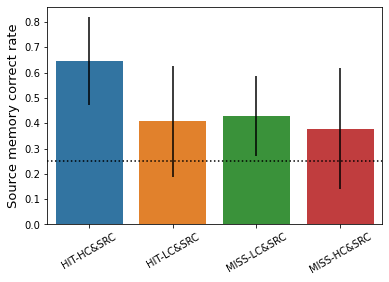

In [50]:
sns.barplot(correct_memory.index, correct_memory.mean(axis=1), yerr=np.std(correct_memory, axis=1))
plt.axhline(y=0.25, linestyle=':', color='black')

locs, labels=plt.xticks()
x_ticks = []
new_xticks=['HIT-HC&SRC', 'HIT-LC&SRC', 'MISS-LC&SRC', 'MISS-HC&SRC']
plt.xticks(locs, new_xticks, rotation=30)

plt.ylabel('Source memory correct rate', size=13)
plt.show()